# Final Project 1 : Linear Regression


Kelompok 3 :
1. Andrea Natania (PYTN-KS17-04)
2. Muhammad Al-Abrour (PYTN-KS17-013)
3. Rofyan Luthfi Mafaza (PYTN-KS17-015)
3. Mufidah Nur Amaliah (PYTN-KS17-021)

## A. Perkenalan

Uber dan Lyft merupakan aplikasi untuk memesan kendaraan online, dan dataset ini merupakan data histori pemesanan dari Uber dan Lyft. 

Dari kolom-kolom dataset ini, akan dilakukan analisis faktor faktor yang mempengaruhi harga dari Uber dan Lyft. Selain itu, akan dilakukan juga pemodelan menggunakan model Regresi Linear untuk memprediksi harga kedua metode transportasi tersebut. Selain itu, model Regresi Linear akan di bandingkan dengan model Random Forest Regressor tanpa hyperparameter tuning dan menggunakan hyperparameter tuning. Setelah melakukan 3 pemodelan, maka akan dilakukan model deployment dan inference menggunakan model dengan akurasi tertinggi.



## B. Import Packages

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from statsmodels.stats.diagnostic import normal_ad
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
import sys

import pickle

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set(style='darkgrid')

## C. Data Loading

In [2]:
df = pd.read_csv('rideshare_kaggle.csv')
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.0330,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.0330,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,15436653

### Check data shape 

In [3]:
df.shape

(693071, 57)

Data ini terdiri dari 57 kolom dan 693071 baris. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Data ini mempunyai kolom numerical (hour, day, month, price, distance, dsb) dan juga data categorical seperti id, destination, cab_type, name dsb.

## D. Data Cleaning

### Check Duplicated Data

In [5]:
df.duplicated().sum()

0

Dari pengecekan di atas, tidak terdapat data duplikat sehingga tidak perlu membuang data duplikat.

### Remove Unnecessary Column

In [6]:
df['name'].unique()

array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool', 'Taxi'],
      dtype=object)

Dari kolom-kolom diatas, kolom yang akan dipakai adalah sebagai berikut:
1. hour : kolom ini digunakan untuk mengetahui harga saat pemesanan layanan Uber atau Lyft. Dari kolom ini juga dapat diketahui apakah ada peningkatan harga layanan pada waktu tertentu, misalnya rush hour. 
2. source : kolom ini digunakan untuk melihat dimanakah lokasi pelanggan banyak memesan layanan Uber atau Lyft
3. destination : kolom ini digunakan untuk melihat dimanakah lokasi tujuan pelanggan layanan Uber atau Lyft
4. cab_type : kolom ini digunakan untuk melihat jenis layanan yang digunakan apakah itu Uber atau Lyft karena kedua layanan tersebut dapat memberikan harga yang berbeda.
5. price : kolom ini digunakan karena merupakan harga dari setiap pemesanan.
6. distance : kolom ini digunakan karena merupakan jarak dari awal lokasi pemesanan dan lokasi tujuan, dan secara umum jarak menentukan harga dari layanan Uber atau Lyft.
7. surge_multiplier : kolom ini digunakan karena kolom ini merupakan pengali untuk harga standar.
8. name : kolom ini digunakan untuk mengetahui jenis mobil yang digunakan karena jenis mobil dapat memengaruhi harga layanan)

Selain dari kolom-kolom diatas tidak akan digunakan karena tidak relevan terhadap analisis, atau data yang disediakan tidak ada keterangan yang jelas untuk isi dari kolom tersebut.

In [7]:
data = df[['name', 'hour', 'source' ,'destination', 'cab_type', 
              'price', 'distance', 'surge_multiplier']]
data

,name,hour,source,destination,cab_type,price,distance,surge_multiplier
0,Shared,9,Haymarket Square,North Station,Lyft,5.0,0.44,1.0
1,Lux,2,Haymarket Square,North Station,Lyft,11.0,0.44,1.0
2,Lyft,1,Haymarket Square,North Station,Lyft,7.0,0.44,1.0
3,Lux Black XL,4,Haymarket Square,North Station,Lyft,26.0,0.44,1.0
4,Lyft XL,3,Haymarket Square,North Station,Lyft,9.0,0.44,1.0
...,...,...,...,...,...,...,...,...
693066,UberXL,23,West End,North End,Uber,13.0,1.00,1.0
693067,UberX,23,West End,North End,Uber,9.5,1.00,1.0
693068,Taxi,23,West End,North End,Uber,NaN,1.00,1.0
693069,Black SUV,23,West End,North End,Uber,27.0,1.00,1.0


### Check Missing Values

In [8]:
data.isnull().sum()

name                    0
hour                    0
source                  0
destination             0
cab_type                0
price               55095
distance                0
surge_multiplier        0
dtype: int64

### Distribusi dari Price

$H_0$ : Harga dari Uber dan Lyft terdistribusi secara normal </br>
$H_1$ : Harga dari Uber dan Lyft tidak terdistribusi secara normal

In [9]:
p_value = normal_ad(data['price'])
p_value

(nan, 0.0)

$H_0$ ditolak karena p-value lebih kecil dari 0.05. Maka dari itu distribusi dari harga Uber dan Lyft tidak terdistribuse secara normal.

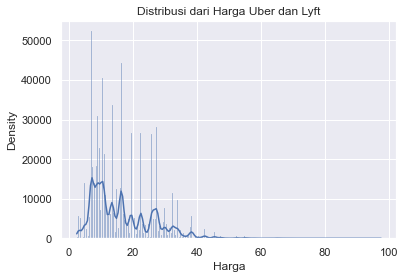

In [10]:
sns.histplot(data['price'], kde=True)  # Set kde=True for the KDE plot

# Customize the plot (optional)
plt.title('Distribusi dari Harga Uber dan Lyft')
plt.xlabel('Harga')
plt.ylabel('Density')

# Display the plot (if using Jupyter Notebook or IPython)
plt.show()

Dari visualisasi di atas, distribusi harga dari layanan Uber dan Lyft tergolong right skewed.

In [11]:
print('Mean :', data['price'].mean())
print('Median :', data['price'].median())

Mean : 16.545125490614065
Median : 13.5


Dari hasil pengecekan di atas, terdapat 55095 data yang null pada kolom price. Karena distribusi dari price tidak normal dan juga nilai mean dan median dari price memiliki selisih yang cukup signifikan, maka data null akan di impute oleh nilai median.

In [12]:
data['price'].fillna(data['price'].median(), inplace=True)

### Central Tendency

Dari data diatas, akan dilakukan pengecekan persebaran data dari distance, karena secara umum jarak menjadi penentu utama dari harga layanan taksi online. 

In [13]:
print('Distance mean:',data['distance'].mean())
print('Distance median:',data['distance'].median())
print('Distance mode:',data['distance'].mode()[0])
print('Distance range:',data['distance'].max()-data['distance'].min())
print('Distance standard deviation:',data['distance'].std())
print('Distance variance:',data['distance'].var())

Distance mean: 2.1894297553930255
Distance median: 2.16
Distance mode: 2.66
Distance range: 7.840000000000001
Distance standard deviation: 1.1389369868597294
Distance variance: 1.2971774600371193


## E. Explorasi Data

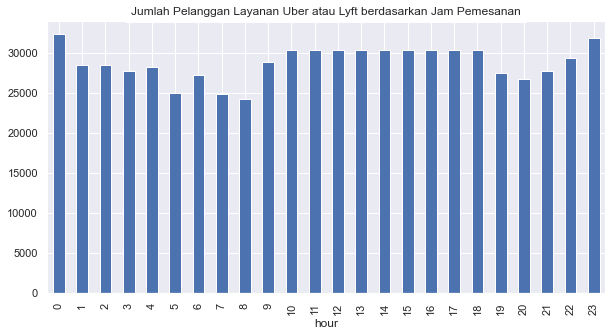

In [14]:
grouped1 = data[['hour']].groupby(['hour']).agg({'hour':'count'})
grouped1.plot(kind='bar', legend=False, figsize=(10,5))
plt.title("Jumlah Pelanggan Layanan Uber atau Lyft berdasarkan Jam Pemesanan", bbox={'facecolor':'1', 'pad':5})
plt.show()

Dari visualisasi di atas, dapat dilihat bahwa pelanggan banyak memesan layanan Uber atau Lyft pada jam 11 dan 12 malam. Sedangkan pelanggan paling sedikit ada pada jam 8 pagi. Pada jam 10 pagi hingga jam 6 sore, terlihat bahwa jumlah pelanggan cenderung stabil.

In [15]:
data['source'].value_counts().head(5)

Financial District    58857
Theatre District      57813
Back Bay              57792
Boston University     57764
North End             57763
Name: source, dtype: int64

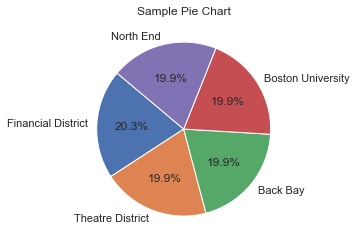

In [16]:
labels = ['Financial District', 'Theatre District', 'Back Bay', 'Boston University', 'North End']

plt.pie(data['source'].value_counts().head(5), labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Sample Pie Chart')
plt.show()

In [17]:
grouped2 = data.groupby(['source']).agg(Count=('source','count'), Price=('price','mean')).reset_index().sort_values(by='Price', ascending=False)
grouped2

,source,Count,Price
2,Boston University,57764,18.427489
3,Fenway,57757,17.991629
4,Financial District,58857,17.810724
8,Northeastern University,57756,17.551204
10,Theatre District,57813,16.349933
7,North Station,57118,16.136262
11,West End,57562,15.900858
0,Back Bay,57792,15.845029
9,South Station,57750,15.499810
1,Beacon Hill,57403,15.492047


Dari hasil groupby titik awal pemesanan di atas, dapat dilihat bahwa pemesanan paling banyak dilakukan dari Financial District. Sedangkan pemesanan paling sedikit dilakukan pada North Station. Namun rata-rata harga dari layanan yang paling tinggi adalah pemesanan yang dilakukan di Boston University dan harga rata-rata termurah dari layanan Uber atau Lyft adalah di Haymarket Square. 

In [18]:
data['destination'].value_counts().head(5)

Financial District    58851
Theatre District      57798
Back Bay              57780
Haymarket Square      57764
Boston University     57764
Name: destination, dtype: int64

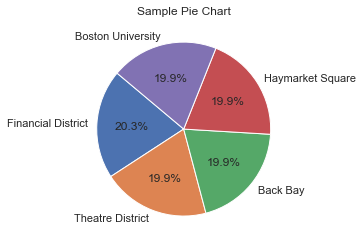

In [19]:
labels = ['Financial District', 'Theatre District', 'Back Bay', 'Haymarket Square', 'Boston University']

plt.pie(data['destination'].value_counts().head(5), labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Sample Pie Chart')
plt.show()

In [20]:
grouped3 = data.groupby(['destination']).agg(Count=('destination','count'), Price=('price','mean')).reset_index().sort_values(by='Price', ascending=False)
grouped3

,destination,Count,Price
2,Boston University,57764,18.509415
3,Fenway,57757,17.777083
4,Financial District,58851,17.686369
8,Northeastern University,57755,17.483593
7,North Station,57119,16.542411
1,Beacon Hill,57403,16.029868
11,West End,57575,16.008864
0,Back Bay,57780,15.994860
10,Theatre District,57798,15.777129
6,North End,57756,14.882774


Dari hasil groupby titik tujuan dari layanan Uber atau Lyft, dapat dilihat bahwa tujuan pelanggan paling banyak ke Financial District. Namun untuk rata-rata harga tertinggi adalah pesanan layanan Uber / Lyft ke tujuan Boston University

### Data Correlation

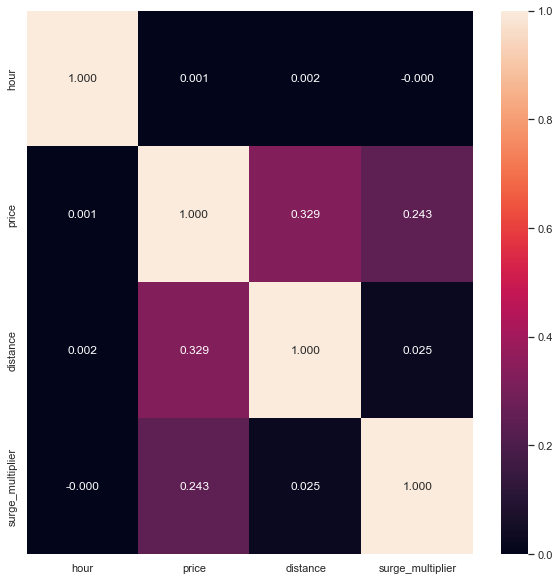

In [21]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, fmt=".3f")
plt.show()

Dari Heatmap di atas, variabel yang memiliki korelasi terkuat dengan price adalah distance dan surge_multiplier.

### Multicollinearity 

In [22]:
def calc_vif(x):
    vif = pd.DataFrame()
    vif['Variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    
    return vif

In [23]:
iv = data[['surge_multiplier','distance']]
calc_vif(iv)

,Variables,VIF
0,surge_multiplier,4.597022
1,distance,4.597022


Karena VIF masih dibawah 5, maka tidak terdapat multikolinearitas antara distance dan surge_multiplier

## F. Data Preprocessing

In [24]:
data1 = data[['name', 'price', 'distance', 'surge_multiplier', 'cab_type']]
data1

,name,price,distance,surge_multiplier,cab_type
0,Shared,5.0,0.44,1.0,Lyft
1,Lux,11.0,0.44,1.0,Lyft
2,Lyft,7.0,0.44,1.0,Lyft
3,Lux Black XL,26.0,0.44,1.0,Lyft
4,Lyft XL,9.0,0.44,1.0,Lyft
...,...,...,...,...,...
693066,UberXL,13.0,1.00,1.0,Uber
693067,UberX,9.5,1.00,1.0,Uber
693068,Taxi,13.5,1.00,1.0,Uber
693069,Black SUV,27.0,1.00,1.0,Uber


### Label Encoding

In [25]:
categorical = data1[['cab_type','name']]

In [26]:
for i in categorical:
    dummies = pd.get_dummies(data1[i], prefix=i, drop_first=True)
    data1 = pd.concat([data1, dummies], axis=1)
    data1 = data1.drop([i], axis = 1)

In [27]:
data1

,price,distance,surge_multiplier,cab_type_Uber,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,11.0,0.44,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,7.0,0.44,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,26.0,0.44,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,9.0,0.44,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,13.0,1.00,1.0,1,0,0,0,0,0,0,0,0,0,0,1,0
693067,9.5,1.00,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0
693068,13.5,1.00,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0
693069,27.0,1.00,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0


### Split Data

In [28]:
train, test = train_test_split(data1, test_size=0.3, random_state=11)
train_index = train.index
test_index = test.index

In [29]:
x_train = train.drop(['price'], axis=1)
y_train = train[['price']]

x_test = test.drop(['price'], axis=1)
y_test = test[['price']]

### Scale Data

In [30]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## G. Pendefinisian dan Pelatihan Model

Model yang akan digunakan adalah Linear Regression, karena dari data yang telah diatas akan dilakukan prediksi harga layanan Uber atau Lyft. Adapun variabel independen dari data ini adalah name, cab_type, surge_multiplier dan distance. Sedangkan variabel dependen dari dataset ini adalah price.

In [31]:
LR = LinearRegression()
model = LR.fit(x_train, y_train) 

## H. Evaluasi Model

In [32]:
r_sq_train = model.score(x_train,y_train)
print('Coefficient of determination training data:',r_sq_train)
r_sq_test = model.score(x_test,y_test)
print('Coefficient of determination testing data:',r_sq_test)
print('Intercept:',model.intercept_)
print('Slope:',model.coef_)

Coefficient of determination training data: 0.9178650590054598
Coefficient of determination testing data: 0.9186524326147307
Intercept: [16.32022125]
Slope: [[ 2.91512866e+00  1.69531785e+00  1.18417229e+09  2.64259522e+00
   6.22844870e+08  6.24876790e+08  6.24205827e+08  6.22772703e+08
   6.23405757e+08  6.22066486e+08 -1.90289308e+00 -3.18956826e+00
  -2.91646519e+00 -1.30762060e+00 -2.91621743e+00]]


Dari hasil diatas, didapatkan bahwa akurasi dari training data adalah sebesar 91.79% dan akurasi dari testing data adalah sebesar 91.87%. Karena akurasi testing data lebih besar dibandingkan training data, maka model ini termasuk overfitting walaupun selisih dari akurasi tidak terlalu signifikan.

### Membandingkan model Linear Regression dengan Random Forest Regression
#### a. Random Forest Regression Tidak menggunakan Hyperparameter tuning

In [33]:
rf_reg = RandomForestRegressor(n_estimators=10, random_state=42)

rf_reg.fit(x_train, y_train)

train_pred_y = rf_reg.predict(x_train)
test_pred_y = rf_reg.predict(x_test)

print(f"train_MAE = {mean_absolute_error(y_train, train_pred_y)}")
print(f"test_MAE = {mean_absolute_error(y_test, test_pred_y)}")
print('Model Score :', rf_reg.score(x_test, y_test))

train_MAE = 1.013558486090595
test_MAE = 1.0371876293253794
Model Score : 0.9656480682426859


Karena Mean Absolute Error untuk testing data lebih tinggi dibandingkan training data, maka model ini termasuk overfitting. Accuracy yang didapatkan menggunakan metode ini adalah sebesar 96.56%. Selanjutnya, akan digunakan RandomForestRegressor dengan hyperparameter tuning.

#### b. Random Forest Regression Menggunakan Hyperparameter Tuning

In [34]:
y_train = y_train.to_numpy().ravel()

param_grid = { 
    'n_estimators': [50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 

rf = RandomForestRegressor()

rf_reg_tuned = GridSearchCV(estimator=rf,
                            param_grid=param_grid,
                            cv=3,
                            n_jobs=-1,
                            verbose=2)

rf_reg_tuned.fit(x_train, y_train)
rf_reg_tuned.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


RandomForestRegressor(max_depth=9, max_features='log2', max_leaf_nodes=9,
                      n_estimators=150)

Dari GridSearchCV diatas, didapatkan bahwa model yang terbaik menggunakan max depth 9, max features log2, max leaf nodes 9 dan n extimators 150. 

In [36]:
rf_reg_tune = RandomForestRegressor(max_depth=9, 
                               max_features='log2', 
                               max_leaf_nodes=9,
                               n_estimators=150)
rf_reg_tune.fit(x_train, y_train)

train_pred_y_tune = rf_reg_tune.predict(x_train)
test_pred_y_tune = rf_reg_tune.predict(x_test)

print(f"train_MAE = {mean_absolute_error(y_train, train_pred_y_tune)}")
print(f"test_MAE = {mean_absolute_error(y_test, test_pred_y_tune)}")
print('Model Score :', rf_reg_tune.score(x_test, y_test))

train_MAE = 3.3334705852296644
test_MAE = 3.3249693467238703
Model Score : 0.7565684287984308


Setelah melakukan model menggunakan hyperparameter tuning, didapatkan mean squared error testing yang lebih kecil dibandingkan training data. Maka model ini termasuk overfitting. Selain itu, accuracy yang didapatkan dari model Random Forest Regression menggunakan hyperparameter tuning hanya 75.67%. 

Dari ketiga data diatas, model dengan akurasi yang paling bagus adalah Random Forest Regression tanpa hyperparameter tuning. Maka dari itu akan dilakukan model inference dengan model tersebut.

## I. Model Deployment and Inference

In [37]:
filename = 'RandomForestReg.pkl'
pickle.dump(rf_reg, open(filename, 'wb'))

In [38]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9656480682426859


In [39]:
y_pred = loaded_model.predict(x_test)
test['Estimated Y'] = np.round(y_pred,2)
test

,price,distance,surge_multiplier,cab_type_Uber,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV,Estimated Y
139182,26.0,1.11,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,26.60
361442,26.0,1.66,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,27.30
98143,17.5,5.56,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,14.30
426072,14.0,4.48,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,13.60
409774,16.5,2.24,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,17.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404162,7.0,0.04,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,7.00
266985,22.5,3.23,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,21.32
19055,13.5,1.57,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,14.15
374480,10.0,2.80,1.0,1,0,0,0,0,0,0,0,0,1,0,0,0,9.80


## K. Kesimpulan

Data diatas dapat dilihat bahwa pelanggan banyak memesan layanan Uber atau Lyft pada jam 11 dan 12 malam. Sedangkan pelanggan paling sedikit ada pada jam 8 pagi. Pada jam 10 pagi hingga jam 6 sore, terlihat bahwa jumlah pelanggan cenderung stabil. 

Dari regresi linier, didapatka persamaan sebagai berikut:
$y = 2.91512866e+00x1 + 1.69531785e+00x2 +  1.18417229e+09x3 +  2.64259522e+00x4 +
   6.22844870e+08x5 +  6.24876790e+08x6 +  6.24205827e+08x7 +  6.22772703e+08x8 +
   6.23405757e+08x9 +  6.22066486e+08x10 -1.90289308e+00x11 -3.18956826e+00x12
  -2.91646519e+00x13 -1.30762060e+00x14 -2.91621743e+00x15$

dimana y adalah price dan </br>
x1 : distance </br>
x2 : surge_multiplier</br>
x3 : cab_type_Uber</br>
x4 : name_Black SUV</br>
x5 : name_Lux</br>
x6 : name_Lux Black</br>
x7 : name_Lux Black XL</br>
x8 : name_Lyft</br>
x9 : name_Lyft XL</br>
x10 : name_Shared</br>
x11 : name_Taxi</br>
x12 : name_UberPool</br>
x13 : name_UberX</br>
x14 : name_UberXL</br>
x15 : name_WAV</br>

Dari model regresi linear diatas didapatkan akurasi sebesar 91.86% untuk testing data.  Setelah melakukan pemodelan menggunakan model Regresi Linear, dilakukan pemodelan menggunakan Random Forest Regression.
1. Tidak menggunakan hyperparameter tuning : model masih overfitting, akurasi yang didapatkan sebesar 96.57%
2. Menggunakan hyperparameter tuning : model tidak overfitting namun akurasi yang didapatkan sebesar 75.67%

Maka dari itu, model deployment dan inference dilakukan menggunakan model Random Forest Regression karena model tersebut memiliki akurasi yang paling tinggi. 